# Noisy Text

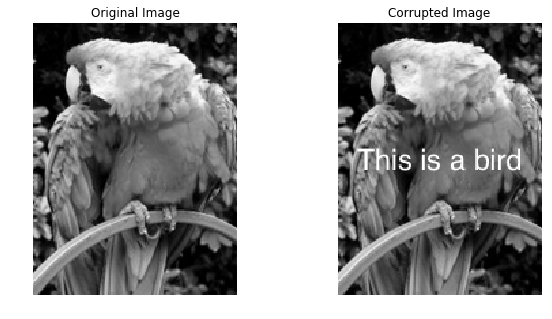

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the image
orig_img = Image.open("data/greybird.png")
corr_img = Image.open("data/greybird_corrupted.png")

# Convert to arrays
Uorig = np.array(orig_img)
Ucorr = np.array(corr_img)
rows, cols = Uorig.shape

Known = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
        if Uorig[i, j] == Ucorr[i, j]:
            Known[i, j] = 1

%matplotlib inline
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(orig_img, cmap='gray');
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(corr_img, cmap='gray');
ax[1].set_title("Corrupted Image")
ax[1].axis('off');

In [2]:
from cvxpy import *
U = Variable(rows, cols)
obj = Minimize(tv(U))
constraints = [mul_elemwise(Known, U) == mul_elemwise(Known, Ucorr)]
prob = Problem(obj, constraints)
prob.solve(verbose=True, solver=SCS)

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 177397, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 59651, constraints m = 118953
Cones:	primal zero / dual free vars: 30000
	soc vars: 88953, soc blks: 29651
Setup time: 3.10e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 2.86e+00  3.06e+00  1.00e+00 -7.93e+06  7.63e+05  0.00e+00  9.66e-02 
   100| 1.29e-03  5.67e-04  5.54e-04  5.23e+05  5.24e+05  5.57e-10  2.52e+00 
   140| 8.08e-04  2.98e-04  3.14e-04  5.24e+05  5.24e+05  5.59e-10  3.45e+00 
-

523981.3902329984

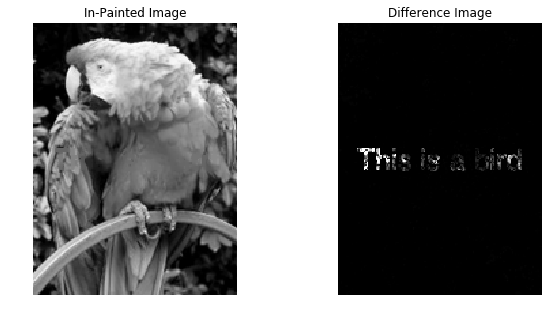

In [3]:
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
# Display the in-painted image.
img_rec = Image.fromarray(U.value)
ax[0].imshow(img_rec);
ax[0].set_title("In-Painted Image")
ax[0].axis('off')

img_diff = Image.fromarray(10*np.abs(Uorig - U.value))
ax[1].imshow(img_diff);
ax[1].set_title("Difference Image")
ax[1].axis('off');

# Random Pixel Deletion

## 70% Deletion

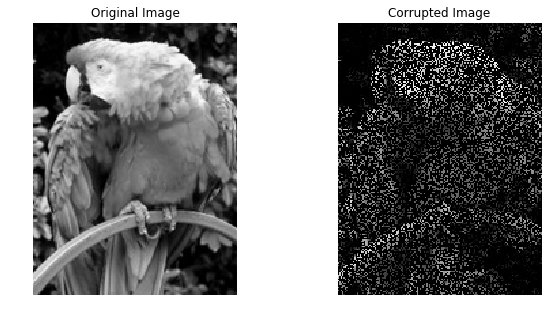

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(30)
orig_img = Image.open("data/greybird.png")

Uorig = np.array(orig_img)
rows, cols = Uorig.shape

Known = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
        if np.random.random() > 0.7:
            Known[i, j] = 1

Ucorr = Known*Uorig
corr_img = Image.fromarray(np.uint8(Ucorr))

%matplotlib inline
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(orig_img, cmap='gray');
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(corr_img, cmap='gray');
ax[1].set_title("Corrupted Image")
ax[1].axis('off');

In [5]:
from cvxpy import *
U = Variable(rows, cols)
obj = Minimize(tv(U))
constraints = [mul_elemwise(Known, U) == mul_elemwise(Known, Ucorr)]
prob = Problem(obj, constraints)
# Use SCS to solve the problem.
prob.solve(verbose=True, solver=SCS)

WARN: A->p (column pointers) not strictly increasing, column 29999 empty
----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 157320, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 59651, constraints m = 118953
Cones:	primal zero / dual free vars: 30000
	soc vars: 88953, soc blks: 29651
Setup time: 3.31e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 2.39e+00  2.67e+00  1.00e+00 -3.64e+06  6.77e+05  0.00e+00  2.11e-01 
   100| 7.59e-04  3.95e-04  1.54e-04  3.69e+05  3.69e+05  3.10e-10  2.93e+00 
------

369227.11413439794

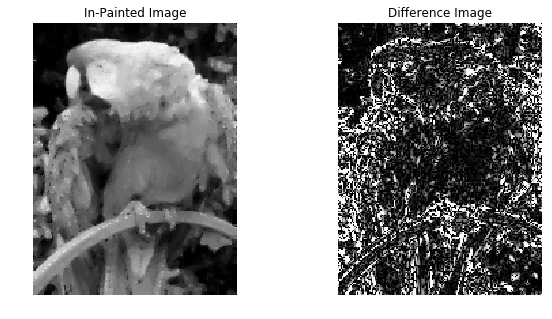

In [6]:
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
# Display the in-painted image.
img_rec = Image.fromarray(U.value)
ax[0].imshow(img_rec);
ax[0].set_title("In-Painted Image")
ax[0].axis('off')

img_diff = Image.fromarray(10*np.abs(Uorig - U.value))
ax[1].imshow(img_diff);
ax[1].set_title("Difference Image")
ax[1].axis('off');

With 70% deletion, the image is getting blurry, but it is still clearly a bird. 

## 90% Deletion

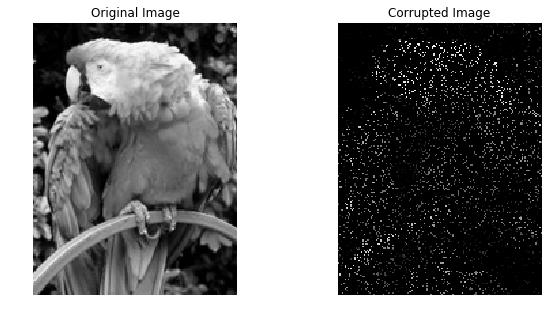

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(30)
orig_img = Image.open("data/greybird.png")

Uorig = np.array(orig_img)
rows, cols = Uorig.shape

Known = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
        if np.random.random() > 0.9:
            Known[i, j] = 1

Ucorr = Known*Uorig
corr_img = Image.fromarray(np.uint8(Ucorr))

%matplotlib inline
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(orig_img, cmap='gray');
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(corr_img, cmap='gray');
ax[1].set_title("Corrupted Image")
ax[1].axis('off');

In [8]:
from cvxpy import *
U = Variable(rows, cols)
obj = Minimize(tv(U))
constraints = [mul_elemwise(Known, U) == mul_elemwise(Known, Ucorr)]
prob = Problem(obj, constraints)
# Use SCS to solve the problem.
prob.solve(verbose=True, solver=SCS)

WARN: A->p (column pointers) not strictly increasing, column 29999 empty
----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 151292, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 59651, constraints m = 118953
Cones:	primal zero / dual free vars: 30000
	soc vars: 88953, soc blks: 29651
Setup time: 4.10e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 2.51e+00  2.90e+00  1.00e+00 -2.20e+06  7.55e+05  0.00e+00  2.82e-01 
    80| 8.02e-04  7.57e-04  1.35e-04  2.33e+05  2.34e+05  1.89e-10  3.02e+00 
------

233459.06983298963

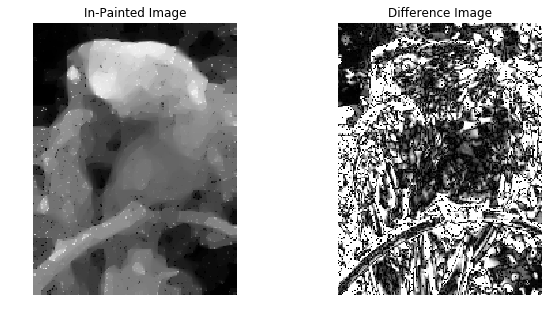

In [9]:
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
# Display the in-painted image.
img_rec = Image.fromarray(U.value)
ax[0].imshow(img_rec);
ax[0].set_title("In-Painted Image")
ax[0].axis('off')

img_diff = Image.fromarray(10*np.abs(Uorig - U.value))
ax[1].imshow(img_diff);
ax[1].set_title("Difference Image")
ax[1].axis('off');

The image still has some features from the original, but no longer resembles a bird.

In [1]:
## 50% Deletion

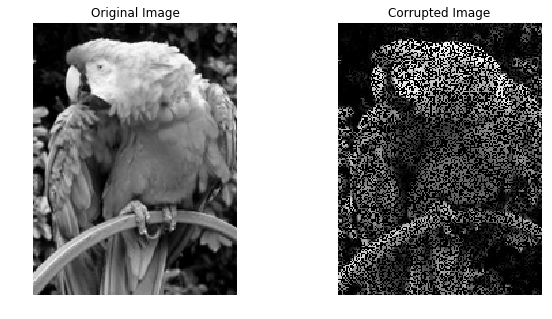

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(30)
orig_img = Image.open("data/greybird.png")

Uorig = np.array(orig_img)
rows, cols = Uorig.shape

Known = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
        if np.random.random() > 0.5:
            Known[i, j] = 1

Ucorr = Known*Uorig
corr_img = Image.fromarray(np.uint8(Ucorr))

%matplotlib inline
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(orig_img, cmap='gray');
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(corr_img, cmap='gray');
ax[1].set_title("Corrupted Image")
ax[1].axis('off');

In [11]:
from cvxpy import *
U = Variable(rows, cols)
obj = Minimize(tv(U))
constraints = [mul_elemwise(Known, U) == mul_elemwise(Known, Ucorr)]
prob = Problem(obj, constraints)
# Use SCS to solve the problem.
prob.solve(verbose=True, solver=SCS)

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 163317, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 59651, constraints m = 118953
Cones:	primal zero / dual free vars: 30000
	soc vars: 88953, soc blks: 29651
Setup time: 3.12e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 2.64e+00  2.98e+00  1.00e+00 -5.22e+06  8.43e+05  0.00e+00  1.58e-01 
   100| 9.62e-04  4.78e-04  2.75e-04  4.38e+05  4.38e+05  4.00e-10  2.66e+00 
----------------------------------------------------------------------------
St

437651.4207889435

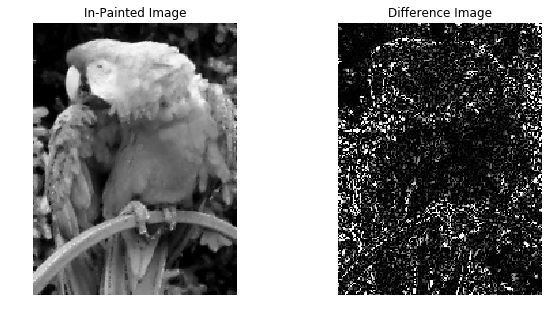

In [12]:
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
# Display the in-painted image.
img_rec = Image.fromarray(U.value)
ax[0].imshow(img_rec);
ax[0].set_title("In-Painted Image")
ax[0].axis('off')

img_diff = Image.fromarray(10*np.abs(Uorig - U.value))
ax[1].imshow(img_diff);
ax[1].set_title("Difference Image")
ax[1].axis('off');

The bird is easily recovered. 

## 95% Deletion

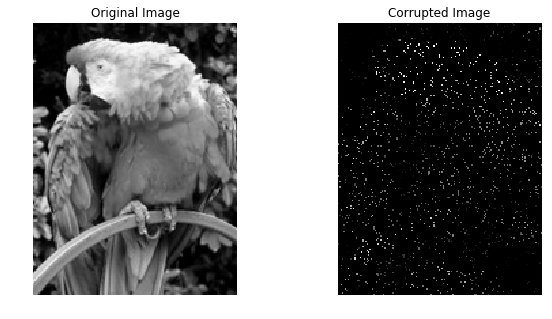

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(30)
orig_img = Image.open("data/greybird.png")

Uorig = np.array(orig_img)
rows, cols = Uorig.shape

Known = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
        if np.random.random() > 0.95:
            Known[i, j] = 1

Ucorr = Known*Uorig
corr_img = Image.fromarray(np.uint8(Ucorr))

%matplotlib inline
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(orig_img, cmap='gray');
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(corr_img, cmap='gray');
ax[1].set_title("Corrupted Image")
ax[1].axis('off');

In [14]:
from cvxpy import *
U = Variable(rows, cols)
obj = Minimize(tv(U))
constraints = [mul_elemwise(Known, U) == mul_elemwise(Known, Ucorr)]
prob = Problem(obj, constraints)
# Use SCS to solve the problem.
prob.solve(verbose=True, solver=SCS)

WARN: A->p (column pointers) not strictly increasing, column 29999 empty
----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 149747, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 59651, constraints m = 118953
Cones:	primal zero / dual free vars: 30000
	soc vars: 88953, soc blks: 29651
Setup time: 3.99e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 2.66e+00  3.14e+00  1.00e+00 -1.60e+06  7.65e+05  0.00e+00  4.17e-01 
   100| 4.68e-04  6.96e-04  7.80e-05  1.60e+05  1.60e+05  1.36e-10  4.97e+00 
------

160416.90994225803

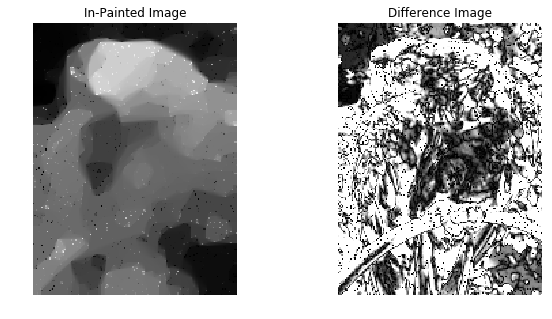

In [15]:
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
# Display the in-painted image.
img_rec = Image.fromarray(U.value)
ax[0].imshow(img_rec);
ax[0].set_title("In-Painted Image")
ax[0].axis('off')

img_diff = Image.fromarray(10*np.abs(Uorig - U.value))
ax[1].imshow(img_diff);
ax[1].set_title("Difference Image")
ax[1].axis('off');

All features are lost. 

# Deleting a K by K block

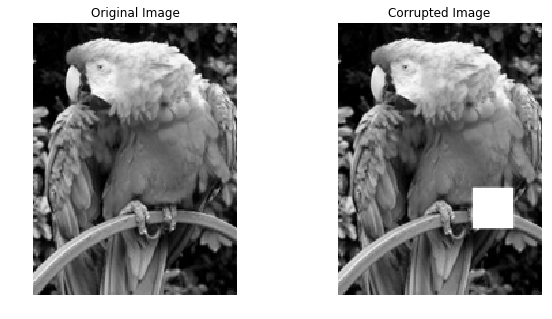

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the image
orig_img = Image.open("data/greybird.png")
corr_img = Image.open("data/greybird_block.png")
# Convert to arrays
Uorig = np.array(orig_img)
Ucorr = np.array(corr_img)
rows, cols = Uorig.shape

Known = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
        if Uorig[i, j] == Ucorr[i, j]:
            Known[i, j] = 1

%matplotlib inline
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(orig_img, cmap='gray');
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(corr_img, cmap='gray');
ax[1].set_title("Corrupted Image")
ax[1].axis('off');

In [17]:
from cvxpy import *
U = Variable(rows, cols)
obj = Minimize(tv(U))
constraints = [mul_elemwise(Known, U) == mul_elemwise(Known, Ucorr)]
prob = Problem(obj, constraints)
# Use SCS to solve the problem.
prob.solve(verbose=True, solver=SCS)

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 177231, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 59651, constraints m = 118953
Cones:	primal zero / dual free vars: 30000
	soc vars: 88953, soc blks: 29651
Setup time: 2.44e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 2.80e+00  2.96e+00  1.00e+00 -7.79e+06  6.37e+05  0.00e+00  2.76e-01 
   100| 1.29e-03  5.45e-04  5.79e-04  5.12e+05  5.12e+05  5.51e-10  2.82e+00 
   140| 8.13e-04  2.94e-04  3.23e-04  5.12e+05  5.12e+05  5.53e-10  3.44e+00 
-

512072.44154785294

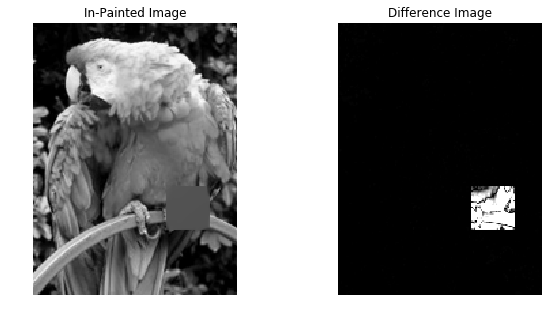

In [18]:
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
# Display the in-painted image.
img_rec = Image.fromarray(U.value)
ax[0].imshow(img_rec);
ax[0].set_title("In-Painted Image")
ax[0].axis('off')

img_diff = Image.fromarray(10*np.abs(Uorig - U.value))
ax[1].imshow(img_diff);
ax[1].set_title("Difference Image")
ax[1].axis('off');

The optimizer is unable to recover the deleted block. 

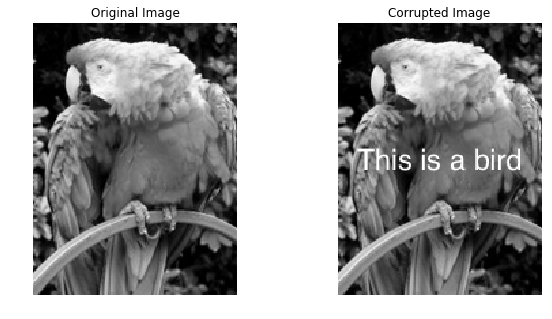

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the image
orig_img = Image.open("data/greybird.png")
corr_img = Image.open("data/greybird_corrupted.png")

# Convert to arrays
Uorig = np.array(orig_img)
Ucorr = np.array(corr_img)
rows, cols = Uorig.shape

Known = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
        if Uorig[i, j] == Ucorr[i, j]:
            Known[i, j] = 1

%matplotlib inline
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(orig_img, cmap='gray');
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(corr_img, cmap='gray');
ax[1].set_title("Corrupted Image")
ax[1].axis('off');

In [ ]:
from cvxpy import *
from cvxopt import *
U = Variable(rows, cols)
obj = Minimize(tv(U))
constraints = [mul_elemwise(Known, U) == mul_elemwise(Known, Ucorr)]
prob = Problem(obj, constraints)
prob.solve(verbose=True, solver=CVXOPT)

CVXOPT does not compute in any reasonable amount of time. 